In [7]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

CONFIDENCE INTERVAL
a) standard error = 1.9535, me = 4.5048, dof = 8, t_conf = 2.3060
b) we're 95% confident that the real difference between the pumping capacity averages of ESCs and control groups
is between 3.3252 and 12.3348
c) .


C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


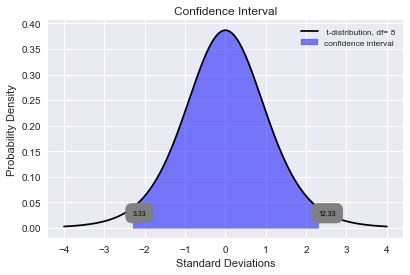

In [3]:
# confidence interval for a difference of means
# example 7.21, 7:22, 

# ESCs
n1 = 9
xbar1 = 3.50
s1 = 5.17
# control
n2 = 9
xbar2 = -4.33
s2 = 2.76
n = 9

xbar = xbar1 - xbar2
cl = .95
sl = 1-cl
dof = n-1

# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
s1t = sl / 2
t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = np.sqrt((s1**2/n1) +(s2**2/n2))
me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
a) standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
b) we're {cl:.0%} confident that the real difference between the pumping capacity averages of ESCs and control groups
is between {lo:.4f} and {hi:.4f}
c) .'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

In [40]:
'''
Prepare. Retrieve critical contextual information, and if appropriate, set up hypotheses.
Check. Ensure the required conditions are reasonably satisfied.
Calculate. Find the standard error, and then construct a condfience interval, or if conducting a
hypothesis test, find a test statistic and p-value.
Conclude. Interpret the results in the context of the application.'''

'\nPrepare. Retrieve critical contextual information, and if appropriate, set up hypotheses.\nCheck. Ensure the required conditions are reasonably satisfied.\nCalculate. Find the standard error, and then construct a condfience interval, or if conducting a\nhypothesis test, find a test statistic and p-value.\nConclude. Interpret the results in the context of the application.'

PREPARE: parameter of interest: difference in smoker and nonsmoker mothers' average infant weights. 
xbar = 0.39999999999999947, s = [ 1.43  1.6 ], n = 150, dof = 149
H0:  there's no difference in smoker and nonsmoker mothers' average infant weights  u_1 - u_2 = 0
HA:  there's difference in smoker and nonsmoker mothers' average infant weights  u_1 - u_2 != 0
significance level: 0.05
CHECK.
independence: data comes from a simple random sample. independence condition satisfies.
normality: as seen in the histograms below, since the n is bigger than 30 and there's no particularly extreme outliers,
the data distributed normally. 
CALCULATE.
se = 0.2579, t* = 1.55
CONCLUDE: 
Since p = 0.1230 and it's bigger than our 0.05 significance level, we reject the null hypothesis and conclude 
the data does not provide strong evidence to accept the notion that there's a difference in smoker and nonsmoker mothers'
average infant weights.


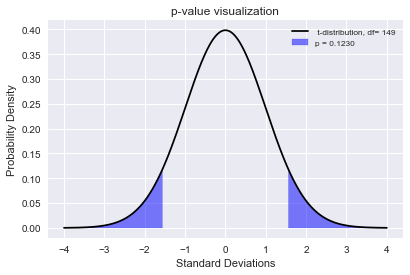

In [8]:
# example 7.23

xbars = np.array([6.78,7.18])
std = np.array([1.43,1.60])
size = np.array([50,100])
n = sum(size)
xbar = max(xbars) - min(xbars) # difference of two means

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-1 # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference in smoker and nonsmoker mothers' average infant weights'''
h0 = ''' there's no difference in smoker and nonsmoker mothers' average infant weights '''
ha = ''' there's difference in smoker and nonsmoker mothers' average infant weights '''

print('''PREPARE: parameter of interest: {poi}. 
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CHECK.
independence: data comes from a simple random sample. independence condition satisfies.
normality: since the n is bigger than 30 and there's no particularly extreme outliers, the data distributed normally. ''')

print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE: 
Since p = {p:.4f} and it's bigger than our {sl:.2f} significance level, we fail to reject the null hypothesis and conclude 
the data does not provide strong evidence to accept the notion that there's a difference in smoker and nonsmoker mothers'
average infant weights.'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

PREPARE. 
parameter of interest: average exam scores for groups. 
xbar = 5.300000000000011, s = [14 20], n = 57, dof = 55
H0:  there's no difference in the average scores of students for two groups, two exams are equally difficult.  u_1 - u_2 = 0
HA:  there's difference in the average scores of students for two groups, one exam is more difficult.  u_1 - u_2 != 0
significance level: 0.01
CHECK.
independence: since this is a propoer experiment where groups (in this case two different exams) assigned randomly independence
condition satisfies.
normality: data distribution is quite normal. normality condition satisfies. 
CALCULATE.
se = 4.6204, t* = 1.15
CONCLUDE: 
Since p = 0.2563 and it's bigger than our 0.01 significance level, we fail to reject the null hypothesis and conclude 
there's no difference in the average scores of students for two groups and one exam is not more difficult than the other.


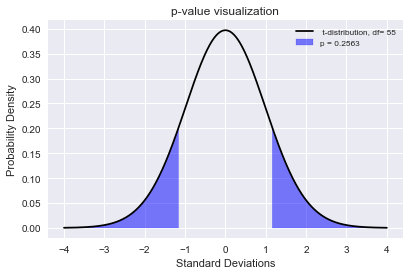

In [45]:
# CASE STUDY, 7.3.3 // GIVEN THE SUMMARY STATISTICS

xbars = np.array([79.4,74.1])
std = np.array([14,20])
size = np.array([30,27])
n = sum(size)
xbar = max(xbars) - min(xbars) # difference of two means

x0 = 0 # null value
cl = .99 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-2 # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''average exam scores for groups'''
h0 = ''' there's no difference in the average scores of students for two groups, two exams are equally difficult. '''
ha = ''' there's difference in the average scores of students for two groups, one exam is more difficult. '''

print('''PREPARE. 
parameter of interest: {poi}. 
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CHECK.
independence: since this is a propoer experiment where groups (in this case two different exams) assigned randomly independence
condition satisfies.
normality: data distribution is quite normal. normality condition satisfies. ''')

print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE: 
Since p = {p:.4f} and it's bigger than our {sl:.2f} significance level, we fail to reject the null hypothesis and conclude 
there's no difference in the average scores of students for two groups and one exam is not more difficult than the other.'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

               mean       std  count
habit                               
nonsmoker  7.186496  1.396227    117
smoker     6.572424  1.121918     33
0.614071484071
PREPARE: parameter of interest: difference in smoker and nonsmoker mothers' average infant weights. 
xbar = 0.6140714840714825, s = [ 1.12191808  1.39622725], n = 150, dof = 148
H0:  there's no difference in smoker and nonsmoker mothers' average infant weights  u_1 - u_2 = 0
HA:  there's difference in smoker and nonsmoker mothers' average infant weights  u_1 - u_2 != 0
significance level: 0.05
CHECK.
independence: data comes from a simple random sample. independence condition satisfies.
normality: as seen in the histograms below, since the n is bigger than 30 and there's no particularly extreme outliers,
the data distributed normally. 
CALCULATE.
se = 0.2341, t* = 2.62
CONCLUDE: 
Since p = 0.0096 and it's lower than our 0.05 significance level, we reject the null hypothesis and conclude 
there's a difference in smoker and non

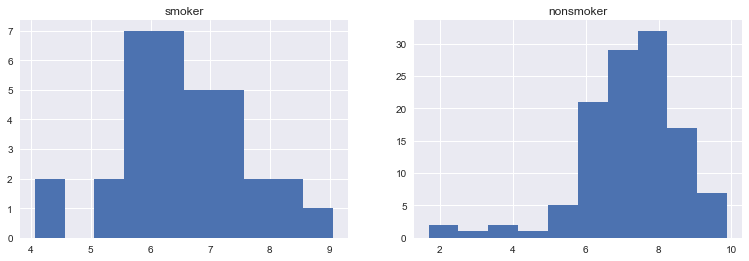

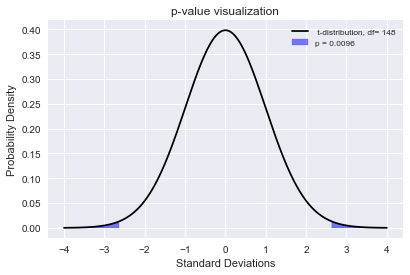

In [44]:
# DIFFERENCE OF TWO MEANS HYPOTHESIS TEST // GIVEN THE RAW DATA

ncbirths = pd.read_csv("data/ncbirths.csv", na_values = "null") # read the data
ncbirths_sample = ncbirths.sample(frac=.15,random_state=178) # take samples from the entire dataset, simple random sample
#ncbirths_sample[group_name].value_counts() # additional step to run

group_name = "habit"
outcome_name = "weight"

# summarizing the sample for means, standard deviations and group sample sizes
summ = ncbirths_sample[[outcome_name,group_name]].groupby(group_name).agg({outcome_name:["mean","std","count"]})[outcome_name]

groups = ncbirths_sample[group_name].unique() # the groups in our dataset in a list
group_size = len(groups) # how many groups that we have
n = len(ncbirths_sample[group_name]) # there are multiple n's in different groups but this is the whole data set's sample size
xbars = list() # multiple point estimates for different groups
std = list() # multiple standard deviations for different groups
size = list() # multiple sample sizes for different groups
for i in range(group_size):
    xbars.append(summ["mean"][groups[i]]) # append every group's mean to list
    std.append(summ["std"][groups[i]]) # append every group's standard deviation to list
    size.append(summ["count"][groups[i]]) # append every group's sample size to list
print(summ)
# converting to array for easier calculations
xbars = np.array(xbars)
std = np.array(std)
size = np.array(size)
xbar = max(xbars) - min(xbars) # difference of two means
print(xbar)

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = sum(size-1) # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference in smoker and nonsmoker mothers' average infant weights'''
h0 = ''' there's no difference in smoker and nonsmoker mothers' average infant weights '''
ha = ''' there's difference in smoker and nonsmoker mothers' average infant weights '''

print('''PREPARE: parameter of interest: {poi}. 
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CHECK.
independence: data comes from a simple random sample. independence condition satisfies.
normality: as seen in the histograms below, since the n is bigger than 30 and there's no particularly extreme outliers,
the data distributed normally. ''')
fig_hist = plt.figure(figsize=(20,4))
for i in range(group_size):
    ax_hist = fig_hist.add_subplot(1,group_size+1,i+1)
    plt.hist(data=ncbirths_sample[ncbirths_sample[group_name] == groups[i]][[group_name,outcome_name]],x=outcome_name)
    plt.title(groups[i])
    
print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE: 
Since p = {p:.4f} and it's lower than our {sl:.2f} significance level, we reject the null hypothesis and conclude 
there's a difference in smoker and nonsmoker mothers' average infant weights.'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

a) those data are paired, since the two fridays are close, those two dates probably are related or connected
comparing another random friday of the year.
b) H0: there's no significant difference in difference of two dates' average, u6-u13 = 0
HA: there's a significant difference in difference of two dates' average, u6-u13 != 0
c) independence: nothing have been said about the data collection but, assuming it's a simple random sample independence 
condition satisfies.
normality: the histograms in the example shows us there's no particularly extreme outliers. normality condition satisfied.

PREPARE. 
parameter of interest: difference between average traffic accident of two dates. 
xbar = 1836, s = 1176, n = 10, dof = 9
H0:  there's no significant difference in two dates' average.  u_1 - u_2 = 0
HA:  there's a significant difference in two dates' average.  u_1 - u_2 != 0
significance level: 0.05
CALCULATE.
se = 371.8839, t* = 4.94
CONCLUDE.
Since p = 0.0008 and it's smaller than our 0.05 

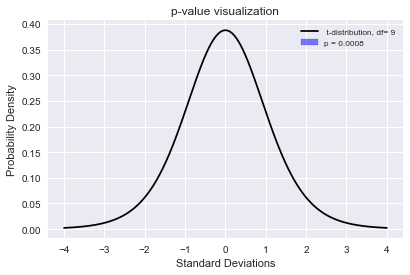

In [66]:
'''7.23 Friday the 13th, Part I. In the early 1990's, researchers in the UK collected data on traffic 
flow, number of shoppers, and traffic accident related emergency room admissions on Friday the 13th and the previous
Friday, Friday the 6th. The histograms below show the distribution of number of cars passing by a specific
intersection on Friday the 6th and Friday the 13th for many such date pairs. Also given are some sample
statistics, where the difference is the number of cars on the 6th minus the number of cars on the 13th.

(a) Are there any underlying structures in these data that should be considered in an analysis? Explain.
(b) What are the hypotheses for evaluating whether the number of people out on Friday the 6th is different
than the number out on Friday the 13th?
(c) Check conditions to carry out the hypothesis test from part (b).
(d) Calculate the test statistic and the p-value.
(e) What is the conclusion of the hypothesis test?
(f) Interpret the p-value in this context.
(g) What type of error might have been made in the conclusion of your test? Explain.'''

print('''a) those data are paired, since the two fridays are close, those two dates probably are related or connected
comparing another random friday of the year.
b) H0: there's no significant difference in difference of two dates' average, u6-u13 = 0
HA: there's a significant difference in difference of two dates' average, u6-u13 != 0
c) independence: nothing have been said about the data collection but, assuming it's a simple random sample independence 
condition satisfies.
normality: the histograms in the example shows us there's no particularly extreme outliers. normality condition satisfied.
''')

xbar = 1836
std = 1176
n = 10

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = 10-1 # degrees of freedom

se = s / np.sqrt(n) # standard error
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference between average traffic flow of two dates'''
h0 = ''' there's no significant difference in two dates' average. '''
ha = ''' there's a significant difference in two dates' average. '''

print('''PREPARE. 
parameter of interest: {poi}. 
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE.
Since p = {p:.4f} and it's smaller than our {sl:.2f} significance level, we reject the null hypothesis and conclude 
the data provide strong evidence that the average number of cars at the intersection is significantly different in two dates.
'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

PREPARE. 
parameter of interest: difference in average 0.99 and 1 carat gold prices. 
xbar = 12.300000000000004, s = [ 13.32  16.13], n = 23, dof = 21
H0:  there's no difference in average 0.99 and 1 carat gold prices. both is equally expensive by unit.  u_1 - u_2 = 0
HA:  there's difference in average 0.99 and 1 carat gold prices. they're not equally expensive by unit.  u_1 - u_2 != 0
significance level: 0.05
CHECK.
independence: it's not stated in the example but assuming it's a simple random sample, independence condition satisfies.
normality: both data sets look normal in the box plot. 
CALCULATE.
se = 4.3619, t* = 2.82
CONCLUDE. 
Since p = 0.0103 and it's smaller than our 0.05 significance level, we reject the null hypothesis and conclude 
there's a significant difference between standardized unit prices of 0.99 carat and 1 carat diamond even though they're both
indistinguishable to the human eye. 


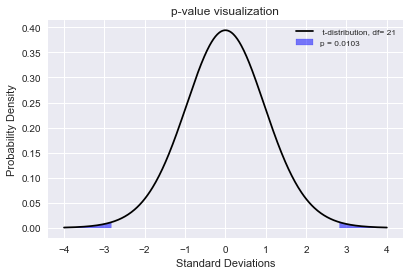

In [71]:
'''7.24 Diamonds, Part I. Prices of diamonds are determined by what is known as the 4 Cs: cut, clarity,
color, and carat weight. The prices of diamonds go up as the carat weight increases, but the increase is not
smooth. For example, the difference between the size of a 0.99 carat diamond and a 1 carat diamond is
undetectable to the naked human eye, but the price of a 1 carat diamond tends to be much higher than the
price of a 0.99 diamond. In this question we use two random samples of diamonds, 0.99 carats and 1 carat,
each sample of size 23, and compare the average prices of the diamonds. In order to be able to compare
equivalent units, we first divide the price for each diamond by 100 times its weight in carats. That is, for
a 0.99 carat diamond, we divide the price by 99. For a 1 carat diamond, we divide the price by 100. The
distributions and some sample statistics are shown below.
Conduct a hypothesis test to evaluate if there is a difference
between the average standardized prices of 0.99 and 1 carat
diamonds. Make sure to state your hypotheses clearly, check
relevant conditions, and interpret your results in context of the data.'''

xbars = np.array([44.51,56.81])
std = np.array([13.32,16.13])
size = np.array([23,23])
n = 23
xbar = max(xbars) - min(xbars) # difference of two means

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-2 # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference in average 0.99 and 1 carat gold prices'''
h0 = ''' there's no difference in average 0.99 and 1 carat gold prices. both is equally expensive by unit. '''
ha = ''' there's difference in average 0.99 and 1 carat gold prices. they're not equally expensive by unit. '''

print('''PREPARE. 
parameter of interest: {poi}. 
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CHECK.
independence: it's not stated in the example but assuming it's a simple random sample, independence condition satisfies.
normality: both data sets look normal in the box plot. ''')

print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE. 
Since p = {p:.4f} and it's smaller than our {sl:.2f} significance level, we reject the null hypothesis and conclude 
there's a significant difference between standardized unit prices of 0.99 carat and 1 carat diamond even though they're both
indistinguishable to the human eye. '''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

PREPARE. 
parameter of interest: difference between average traffic accident of two dates. 
xbar = -3.33, s = 3.01, n = 6, dof = 5
H0:  there's no significant difference in two dates' average traffic accident.  u_1 - u_2 = 0
HA:  there's a significant difference in two dates' average traffic accident.  u_1 - u_2 != 0
significance level: 0.05
CALCULATE.
se = 1.2288, t* = -2.71
CONCLUDE.
Since p = 0.0423 and it's smaller than our 0.05 significance level, we reject the null hypothesis and conclude 
the data provide strong evidence that the average number of traffic accident is significantly different between two dates.

CONFIDENCE INTERVAL
standard error = 1.2288, me = 3.1588, dof = 5, t_conf = 2.5706
we're 95% confident that the real difference of average traffic accidents between two dates is between -6.4888 and -0.1712


C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


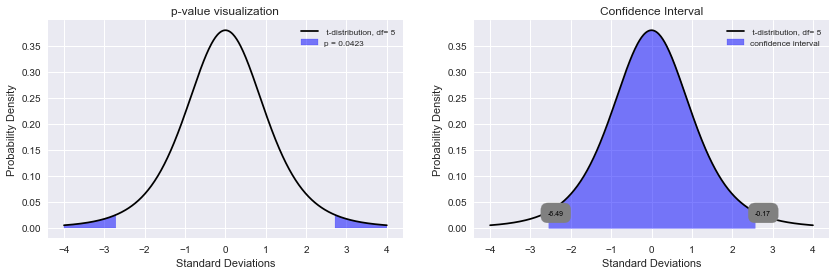

In [81]:
'''7.25 Friday the 13th, Part II. The Friday the 13th study reported in Exercise 7.23 also provides data on
traffic accident related emergency room admissions. The distributions of these counts from Friday the 6th
and Friday the 13th are shown below for six such paired dates along with summary statistics. You may
assume that conditions for inference are met.

(a) Conduct a hypothesis test to evaluate if there is a difference between the average numbers of traffic
accident related emergency room admissions between Friday the 6th and Friday the 13th.
(b) Calculate a 95% confidence interval for the difference between the average numbers of traffic accident
related emergency room admissions between Friday the 6th and Friday the 13th.
(c) The conclusion of the original study states, "Friday 13th is unlucky for some. The risk of hospital
admission as a result of a transport accident may be increased by as much as 52%. Staying at home is
recommended." Do you agree with this statement? Explain your reasoning.'''

# HYPOTHESIS TEST
xbar = -3.33
s = 3.01
n = 6

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = 6-1 # degrees of freedom

se = s / np.sqrt(n) # standard error
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference between average traffic accident of two dates'''
h0 = ''' there's no significant difference in two dates' average traffic accident. '''
ha = ''' there's a significant difference in two dates' average traffic accident. '''

print('''PREPARE. 
parameter of interest: {poi}. 
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE.
Since p = {p:.4f} and it's smaller than our {sl:.2f} significance level, we reject the null hypothesis and conclude 
the data provide strong evidence that the average number of traffic accident is significantly different between two dates.
'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

# CONFIDENCE INTERVAL
fig_conf = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)

t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)

me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
we're {cl:.0%} confident that the real difference of average traffic accidents between two dates is between {lo:.4f} and {hi:.4f}'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

CONFIDENCE INTERVAL
standard error = 4.3619, me = 9.0710, dof = 21, t_conf = 2.0796
we're 95% confident that the real standardized average price difference between 0.99 and 1 carat diamonds is between 
3.2290 and 21.3710 dollars


C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


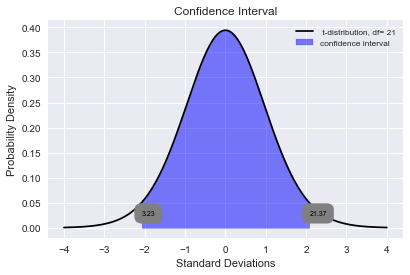

In [85]:
'''7.26 Diamonds, Part II. In Exercise 7.24, we discussed diamond prices (standardized by weight) for dia-
monds with weights 0.99 carats and 1 carat. See the table for summary statistics, and then construct a 95%
confidence interval for the average difference between the standardized prices of 0.99 and 1 carat diamonds.
You may assume the conditions for inference are met.'''

xbars = np.array([44.51,56.81])
std = np.array([13.32,16.13])
size = np.array([23,23])
n = 23
xbar = max(xbars) - min(xbars) # difference of two means

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-2 # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)

t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)

me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
we're {cl:.0%} confident that the real standardized average price difference between 0.99 and 1 carat diamonds is between 
{lo:.4f} and {hi:.4f} dollars'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

PREPARE.
parameter of interest: difference in average weights of horsebean and linseed fed chicks.
xbar = 58.55000000000001, s = [ 38.63  52.24], n = 10, dof = 9
H0:  there's no difference in average weights of horsebean and linseed fed chicks.  u_1 - u_2 = 0
HA:  there's difference in average weights of horsebean and linseed fed chicks.  u_1 - u_2 != 0
significance level: 0.05
CHECK.
independence: this is a proper experiment with randomized assignments. the independence condition satisfies.
normality: both data sets look normal in the box plot. 
CALCULATE.
se = 19.4074, t* = 3.02
CONCLUDE. 
Since p = 0.0146 and it's smaller than our 0.05 significance level, we reject the null hypothesis and conclude 
there's a significant difference in average weights of horsebean and linseed fed chicks. 


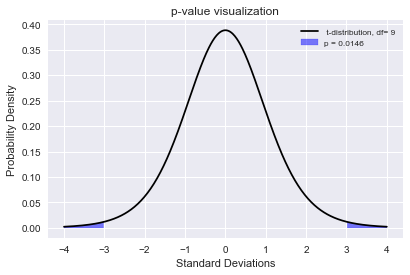

In [91]:
'''7.27 Chicken diet and weight, Part I. Chicken farming is a multi-billion dollar industry, and any methods
that increase the growth rate of young chicks can reduce consumer costs while increasing company profits,
possibly by millions of dollars. An experiment was conducted to measure and compare the effectiveness of
various feed supplements on the growth rate of chickens. Newly hatched chicks were randomly allocated into
six groups, and each group was given a different feed supplement. Below are some summary statistics from
this data set along with box plots showing the distribution of weights by feed type.

(a) Describe the distributions of weights of chickens that were fed linseed and horsebean.
(b) Do these data provide strong evidence that the average weights of chickens that were fed linseed and
horsebean are different? Use a 5% significance level.
(c) What type of error might we have committed? Explain.
(d) Would your conclusion change if we used alpha = 0.01?'''

xbars = np.array([160.20,218.75])
std = np.array([38.63,52.24])
size = np.array([10,12])
n = 10
xbar = max(xbars) - min(xbars) # difference of two means

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-1 # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference in average weights of horsebean and linseed fed chicks'''
h0 = ''' there's no difference in average weights of horsebean and linseed fed chicks. '''
ha = ''' there's difference in average weights of horsebean and linseed fed chicks. '''

print('''PREPARE.
parameter of interest: {poi}.
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CHECK.
independence: this is a proper experiment with randomized assignments. the independence condition satisfies.
normality: both data sets look normal in the box plot. ''')

print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE. 
Since p = {p:.4f} and it's smaller than our {sl:.2f} significance level, we reject the null hypothesis and conclude 
there's a significant difference in average weights of horsebean and linseed fed chicks. '''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

PREPARE.
parameter of interest: difference in average city MPG of automatic and manual cars.
xbar = 3.7300000000000004, s = [ 3.58  4.51], n = 26, dof = 25
H0:  there's no difference in average city MPG of automatic and manual cars.  u_1 - u_2 = 0
HA:  there's difference in average city MPG of automatic and manual cars.  u_1 - u_2 != 0
significance level: 0.05
CHECK.
we're assuming all conditions are satisfied. 
CALCULATE.
se = 1.1293, t* = 3.30
CONCLUDE. 
Since p = 0.0029 and it's smaller than our 0.05 significance level, we reject the null hypothesis and conclude 
there's a significant difference in average city MPG of automatic and manual cars. 


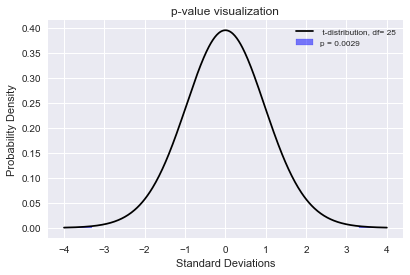

In [94]:
'''7.28 Fuel efficiency of manual and automatic cars, Part I. Each year the US Environmental Protection
Agency (EPA) releases fuel economy data on cars manufactured in that year. Below are summary statistics
on fuel efficiency (in miles/gallon) from random samples of cars with manual and automatic transmissions.
Do these data provide strong evidence of a difference between the average fuel efficiency of cars with manual
and automatic transmissions in terms of their average city mileage? Assume that conditions for inference
are satisfied.'''
xbars = np.array([16.12,19.85])
std = np.array([3.58,4.51])
size = np.array([26,26])
n = 26
xbar = max(xbars) - min(xbars) # difference of two means

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-1 # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference in average city MPG of automatic and manual cars'''
h0 = ''' there's no difference in average city MPG of automatic and manual cars. '''
ha = ''' there's difference in average city MPG of automatic and manual cars. '''

print('''PREPARE.
parameter of interest: {poi}.
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CHECK.
we're assuming all conditions are satisfied. ''')

print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE. 
Since p = {p:.4f} and it's smaller than our {sl:.2f} significance level, we reject the null hypothesis and conclude 
there's a significant difference in average city MPG of automatic and manual cars. '''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

PREPARE.
parameter of interest: difference in average weights of casein and soybean fed chicks.
xbar = 77.14999999999998, s = [ 64.43  54.13], n = 12, dof = 11
H0:  there's no difference in average weights of casein and soybean fed chicks.  u_1 - u_2 = 0
HA:  there's difference in average weights of casein and soybean fed chicks.  u_1 - u_2 != 0
significance level: 0.05
CHECK.
we're assuming all conditions are satisfied. 
CALCULATE.
se = 23.5632, t* = 3.27
CONCLUDE. 
Since p = 0.0074 and it's smaller than our 0.05 significance level, we reject the null hypothesis and conclude 
there's a significant difference in average weights of casein and soybean fed chicks. 


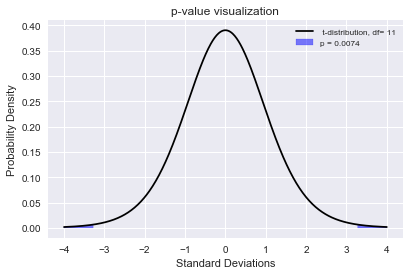

In [96]:
'''7.29 Chicken diet and weight, Part II. Casein is a common weight gain supplement for humans. Does it
have an effect on chickens? Using data provided in Exercise 7.27, test the hypothesis that the average weight
of chickens that were fed casein is different than the average weight of chickens that were fed soybean. If
your hypothesis test yields a statistically significant result, discuss whether or not the higher average weight
of chickens can be attributed to the casein diet. Assume that conditions for inference are satisfied.'''

xbars = np.array([323.58,246.43])
std = np.array([64.43,54.13])
size = np.array([12,14])
n = 12
xbar = max(xbars) - min(xbars) # difference of two means

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-1 # degrees of freedom

se = np.sqrt(sum(std**2/size)) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

#PREPARE
poi = '''difference in average weights of casein and soybean fed chicks'''
h0 = ''' there's no difference in average weights of casein and soybean fed chicks. '''
ha = ''' there's difference in average weights of casein and soybean fed chicks. '''

print('''PREPARE.
parameter of interest: {poi}.
xbar = {xbar}, s = {s}, n = {n}, dof = {dof}
H0: {h0} u_1 - u_2 = {x0}
HA: {ha} u_1 - u_2 != {x0}
significance level: {sl:.2f}'''
.format(xbar=xbar,s=std,n=n,dof=dof,sl=sl,x0=x0,h0=h0,ha=ha,poi=poi))

print('''CHECK.
we're assuming all conditions are satisfied. ''')

print('''CALCULATE.
se = {se:.4f}, t* = {t:.2f}
CONCLUDE. 
Since p = {p:.4f} and it's smaller than our {sl:.2f} significance level, we reject the null hypothesis and conclude 
there's a significant difference in average weights of casein and soybean fed chicks. '''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')
legend = ax.legend(shadow=True,fontsize='small')

CONFIDENCE INTERVAL
standard error = 1.4289, me = 2.9428, dof = 25, t_conf = 2.0595
we're 98% confident that the real average highway MPG difference between automatic and manual cars is between 
2.0172 and 7.9028 in favor of manual.


C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


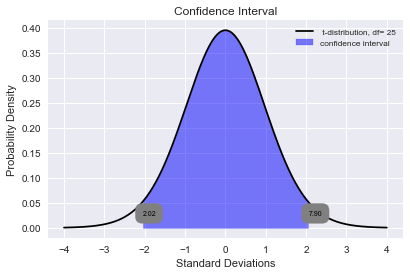

In [106]:
'''7.30 Fuel efficiency of manual and automatic cars, Part II. The table provides summary statistics on
highway fuel economy of the same 52 cars from Exercise 7.28. Use these statistics to calculate a 98%
confidence interval for the difference between average highway mileage of manual and automatic cars, and
interpret this interval in the context of the data.'''

xbars = np.array([22.92,27.88])
std = np.array([5.29,5.01])
size = np.array([26,26])
n = 26
xbar = max(xbars) - min(xbars) # difference of two means

cl = .98
sl = 1-cl
dof = n-1

# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)

t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = np.sqrt(sum(std**2/size))
me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
we're {cl:.0%} confident that the real average highway MPG difference between automatic and manual cars is between 
{lo:.4f} and {hi:.4f} in favor of manual.'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

TREATMENT 1
H0: u_diff = 0
HA: u_diff != 0
independence: it's a randomized experiment. independence condition satisfies.
normality: the data is normally distributed.

se = 3.2873, t* = 1.89
Since p = 0.0814 and it's bigger than our 0.05 significance level, we fail to reject the null hypothesis and conclude 
the data does not provide significant evidence to believe the notion that treatment 1 has significant effects on prisoners.

TREATMENT 2
H0: u_diff = 0
HA: u_diff != 0
independence: it's a randomized experiment. independence condition satisfies.
normality: the data is normally distributed.

se = 2.1221, t* = 1.35
Since p = 0.2008 and it's bigger than our 0.05 significance level, we fail to reject the null hypothesis and conclude 
the data does not provide significant evidence to believe the notion that treatment 2 has significant effects on prisoners.

TREATMENT 3
H0: u_diff = 0
HA: u_diff != 0
independence: it's a randomized experiment. independence condition satisfies.
normality: 

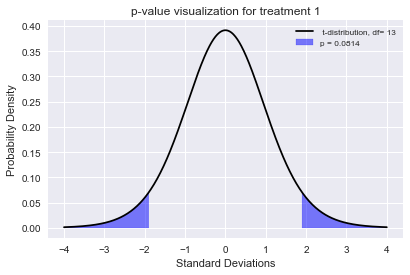

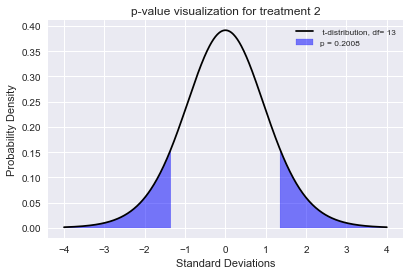

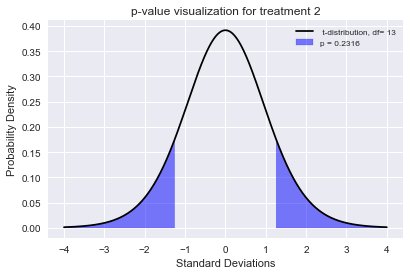

In [120]:
'''7.31 Prison isolation experiment, Part I. Subjects from Central Prison in Raleigh, NC, volunteered for
an experiment involving an "isolation" experience. The goal of the experiment was to find a treatment
that reduces subjects' psychopathic deviant T scores. This score measures a person's need for control or
their rebellion against control, and it is part of a commonly used mental health test called the Minnesota
Multiphasic Personality Inventory (MMPI) test. The experiment had three treatment groups:
(1) Four hours of sensory restriction plus a 15 minute "therapeutic" tape advising that professional help is
available.
(2) Four hours of sensory restriction plus a 15 minute "emotionally neutral" tape on training hunting dogs.
(3) Four hours of sensory restriction but no taped message.
Forty-two subjects were randomly assigned to these treatment groups, and an MMPI test was administered
before and after the treatment. Distributions of the differences between pre and post treatment scores (pre
- post) are shown below, along with some sample statistics. Use this information to independently test the
effectiveness of each treatment. Make sure to clearly state your hypotheses, check conditions, and interpret
results in the context of the data.'''
# TREATMENT 1
print("TREATMENT 1")
xbar = 6.21
s = 12.3
n = 14

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-1 # degrees of freedom

se = s / np.sqrt(n) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

print('''H0: u_diff = 0
HA: u_diff != 0
independence: it's a randomized experiment. independence condition satisfies.
normality: the data is normally distributed.
''')

print('''se = {se:.4f}, t* = {t:.2f}
Since p = {p:.4f} and it's bigger than our {sl:.2f} significance level, we fail to reject the null hypothesis and conclude 
the data does not provide significant evidence to believe the notion that treatment 1 has significant effects on prisoners.'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization for treatment 1')
legend = ax.legend(shadow=True,fontsize='small')

# TREATMENT 2
print("\nTREATMENT 2")
xbar = 2.86
s = 7.94
n = 14

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-1 # degrees of freedom

se = s / np.sqrt(n) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

print('''H0: u_diff = 0
HA: u_diff != 0
independence: it's a randomized experiment. independence condition satisfies.
normality: the data is normally distributed.
''')

print('''se = {se:.4f}, t* = {t:.2f}
Since p = {p:.4f} and it's bigger than our {sl:.2f} significance level, we fail to reject the null hypothesis and conclude 
the data does not provide significant evidence to believe the notion that treatment 2 has significant effects on prisoners.'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization for treatment 2')
legend = ax.legend(shadow=True,fontsize='small')

# TREATMENT 3
print("\nTREATMENT 3")
xbar = -3.21
s = 9.57
n = 14

x0 = 0 # null value
cl = .95 # confidence level
sl = 1-cl # significance level
s1t = sl/2 # significance level in one tail
dof = n-1 # degrees of freedom

se = s / np.sqrt(n) # standard error, extended
t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score

print('''H0: u_diff = 0
HA: u_diff != 0
independence: it's a randomized experiment. independence condition satisfies.
normality: the data is normally distributed.
''')

print('''se = {se:.4f}, t* = {t:.2f}
Since p = {p:.4f} and it's bigger than our {sl:.2f} significance level, we fail to reject the null hypothesis and conclude 
the data does not provide significant evidence to believe the notion that treatment 3 has significant effects on prisoners.'''
.format(sl=sl,p=p,se=se,t=t))

# viz
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,2,1)
y = stats.t.pdf(x, dof)
ax.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization for treatment 2')
legend = ax.legend(shadow=True,fontsize='small')

In [122]:
'''7.32 True / False: comparing means. Determine if the following statements are true or false, and explain
your reasoning for statements you identify as false.
(a) When comparing means of two samples where n1 = 20 and n2 = 40, we can use the normal model for
the difference in means since n2 >= 30.
(b) As the degrees of freedom increases, the t-distribution approaches normality.
(c) We use a pooled standard error for calculating the standard error of the difference between means when
sample sizes of groups are equal to each other.'''
print('''a) false.
b) true.
c) false. we calculate pooled standard error when we're confident about both population standard deviation are almost equal
''')

a) false.
b) true.
c) false. we calculate pooled standard error when we're confident about both population standard deviation are almost equal

